# SyriaTel Customer Churn Prediction

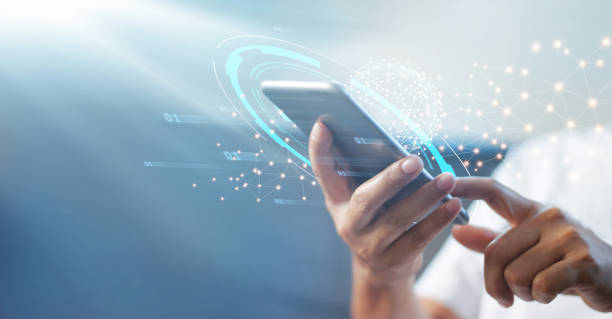

## Overview

For Telco companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.
The churn metric is expressed as the percentage of customers who cancel their contract or subscription within a specific period, typically a month. For example, if SyriaTel had 10 million customers at the beginning of January and 500,000 customers terminated their contracts by the end of January, the monthly churn rate for January would be 5%.
This project is geared towards predicting and reducing customer churn for SyriaTel by analyzing customer behavior and applying machine learning models to identify high-risk customers and implement retention strategies.


## 1. Business UnderStanding

Problem Statement
SyriaTel is a prominent telecommunications provider in Syria, offering a range of services including mobile and fixed-line voice communication, data services, and broadband internet. The company aims to expand its market share and enhance customer satisfaction while maintaining a strong and competitive position in the telecom industry.
SyriaTel is facing a high churn rate, with many customers discontinuing their services and switching to competitors. The company wants to address this issue by developing a customer churn prediction model. By analyzing the dataset, SyriaTel aims to gain insights into factors associated with churn, with the goal of reducing churn rate, increasing customer retention, and improving overall profitability.

Specific Objectives
1. Identify the factors that are most likely to lead to customer churn.

2. Develop a model that can accurately predict which customers are at risk of churning.

3. Take proactive steps to retain customers who are at risk of churning.


## Success Metrics
- Developing a robust churn prediction model with high recall score of 0.8.

- Identifying the key features and factors that significantly contribute to customer churn.

- Providing actionable insights and recommendations to the telecom company for reducing churn and improving customer retention.
- Demonstrating the value of churn prediction models in enabling proactive retention strategies and reducing revenue  losses due to customer churn.

# Import libraries and packages

In [2]:

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('./data/bigml_59.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **2. Exploratory data analysis** 

In [4]:
shape = df.shape
print(f"The DataFrame has {shape[0]} rows and {shape[1]} columns.")

The DataFrame has 3333 rows and 21 columns.


In [5]:
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Column Names and Descriptions:

Based on the column descriptions, below are further comments on some of them based on relevance for modelling or predicting house prices.
* **Id and Date:** These columns can be useful for identifying records and time-based analysis. However, they may not be directly useful for modeling.
* **Price:** This is the target variable we aim to predict.
* **Bedrooms and Bathrooms:** These are essential features representing the size and functionality of the house.
* **Square Footage:** The living area (sqft_living) and lot size (sqft_lot) are crucial features for predicting house prices.

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object or bool. Numerical variables have data type float64 or int64.


First of all, I will find categorical variables.

In [7]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'bool']).columns

# Print categorical variables
print("Categorical variables:")
print(categorical_vars)

Categorical variables:
Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


In [8]:
# view the categorical variables

df[categorical_vars].head()

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,False
1,OH,371-7191,no,yes,False
2,NJ,358-1921,no,no,False
3,OH,375-9999,yes,no,False
4,OK,330-6626,yes,no,False


### Summary of categorical variables


- There are 5 categorical variables. These are given by `state`, `phone number`, `international plan`, `voive mail plan`,  and  `churn`.


- Churn is a binary categorical variables and is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [9]:
# check missing values in categorical variables

df[categorical_vars].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
churn                 0
dtype: int64

We can see that there no missing values in the categorical variables dataset.

### Frequency counts of categorical variables

Now, I will check the frequency counts of categorical variables.

In [10]:
# view frequency of categorical variables

for var in categorical_vars: 
    
    print(df[var].value_counts())

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
336-3819    1
402-2482    1
368-3287    1
419-9509    1
370-2892    1
           ..
327-3587    1
408-8650    1
400-6454    1
385-1423    1
370-3271    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64
False    2850
True      483
Name: churn, dtype: int64


In [11]:
# View frequency distribution of categorical variables
for var in categorical_vars:
    # Calculate and print the frequency distribution as proportions
    freq_distribution = df[var].value_counts(normalize=True)
    print(f"Frequency distribution for {var}:")
    print(freq_distribution)
    print()

Frequency distribution for state:
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OH    0.023402
WI    0.023402
OR    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
ID    0.021902
VT    0.021902
MI    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ME    0.018602
NM    0.018602
ND    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

Frequency distribution for phone number:
336-3819    0.0003
402-2482    0.0003
368-3287    0.0003
419-9509    0.0003
370-2892    0.0003
             ...  
327-3587    0.000

### Number of labels: cardinality

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [12]:
for var in categorical_vars:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels
churn  contains  2  labels


We can see that there is a `phone number` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of labels.

### Feature Engineering of phonenumber Variable

In [13]:
# Extracting phone codes (assuming phone numbers are in a specific format)
df['PhoneCode'] = df['phone number'].str[:3]
df['PhoneCode']

0       382
1       371
2       358
3       375
4       330
       ... 
3328    414
3329    370
3330    328
3331    364
3332    400
Name: PhoneCode, Length: 3333, dtype: object

In [14]:
# Verify the first few rows
print(df[['phone number', 'PhoneCode']].head())

  phone number PhoneCode
0     382-4657       382
1     371-7191       371
2     358-1921       358
3     375-9999       375
4     330-6626       330


In [15]:
# Check for any unusual values in 'PhoneCode'
print(df['PhoneCode'].value_counts())

405    53
408    48
406    47
352    47
333    46
       ..
342    24
421    24
412    23
422    19
327    19
Name: PhoneCode, Length: 96, dtype: int64


In [16]:
# Check for missing values in 'PhoneCode'
print(df['PhoneCode'].isnull().sum())

0


Phone_Code visualization

count     3333
unique      96
top        405
freq        53
Name: PhoneCode, dtype: object


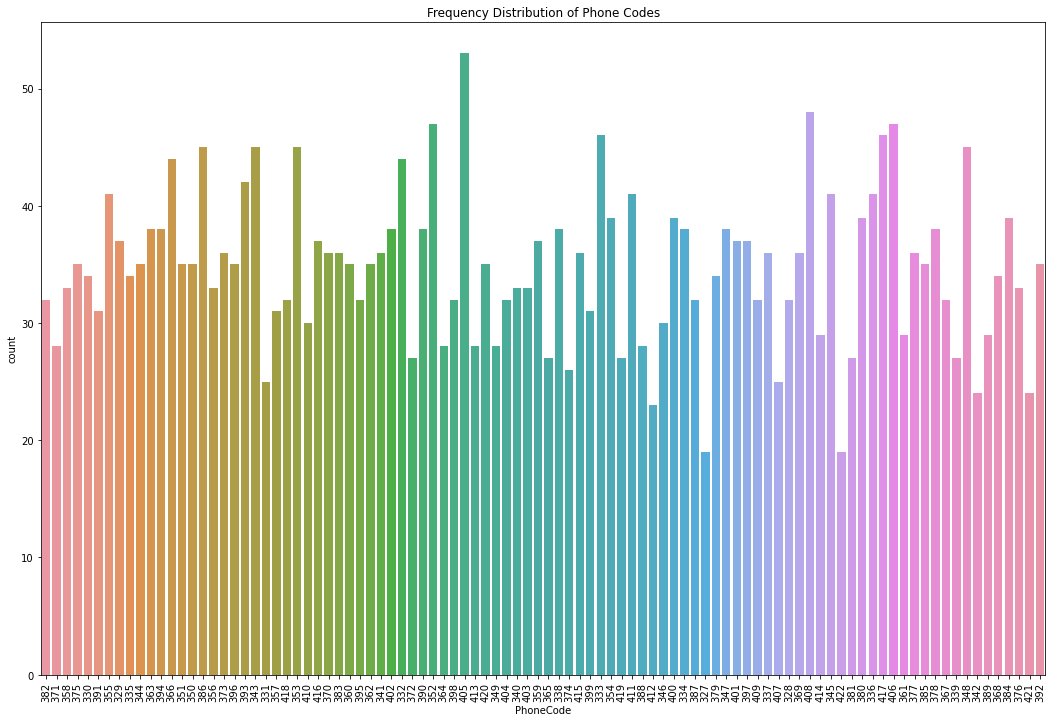

In [17]:
# Summary statistics of the 'PhoneCode' column
print(df['PhoneCode'].describe())

# Plot the frequency distribution of phone codes
plt.figure(figsize=(18, 12))
sns.countplot(x='PhoneCode', data=df)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Phone Codes')
plt.show()

In [18]:
df['phone number'].dtypes

dtype('O')

We can see that the data type of `phone number` variable is object. I will parse the "PhoneCode" as object.

In [19]:
# Ensure 'PhoneCode' is of object type
df['PhoneCode'] = df['PhoneCode'].astype('object')

In [20]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We can see that there is an additional columns created from `PhoneCode` variable. Now, I will drop the original `phone number` variable from the dataset.

In [21]:
# drop the original 'phone number' variable

df.drop('phone number', axis=1, inplace = True)

In [22]:
# preview the dataset again

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,PhoneCode
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,382
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,371
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,358
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,375
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,330


Now, we can see that the `phone number` variable has been removed from the dataset and 'PhoneCode' has been added

### Explore Categorical Variables


Now, I will explore the categorical variables one by one.

In [23]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'bool']).columns

# Print categorical variables
print('There are {} categorical variables\n'.format(len(categorical_vars)))

print('The categorical variables are :', categorical_vars)

There are 5 categorical variables

The categorical variables are : Index(['state', 'international plan', 'voice mail plan', 'churn', 'PhoneCode'], dtype='object')


We can see that there are 5 categorical variables in the dataset. The `phone number` variable has been removed. First, I will check missing values in categorical variables.

In [24]:
# check for missing values in categorical variables 

df[categorical_vars].isnull().sum()

state                 0
international plan    0
voice mail plan       0
churn                 0
PhoneCode             0
dtype: int64

### Explore `state` variable

In [25]:
# print number of labels in state variable

print('state contains', len(df["state"].unique()), 'labels')

state contains 51 labels


In [26]:
# check labels in state variable

df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [27]:
# check frequency distribution of values in state variable

df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [28]:
# let's do One Hot Encoding of state variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["state"], drop_first=True).head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `international plan` variable

In [29]:
# print number of labels in international plan variable

print('international plan contains', len(df['international plan'].unique()), 'labels')

international plan contains 2 labels


In [30]:
# check labels in international plan variable

df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
# check frequency distribution of values in international plan variable

df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [32]:
# let's do One Hot Encoding of international plan variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    323
NaN      0
dtype: int64

There are 323 yes values and no missing values in the `international plan` variable. The rest are no values

### Explore `voice mail plan` variable

In [34]:
# print number of labels in voice mail plan variable

print('voice mail plan contains', len(df['voice mail plan'].unique()), 'labels')

voice mail plan contains 2 labels


In [35]:
# check labels in voice mail plan variable

df['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [36]:
# check frequency distribution of values in voice mail plan variable

df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [37]:
# let's do One Hot Encoding of voice mail plan variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    922
NaN      0
dtype: int64

There are 922 yes values and no missing values in the `voice mail plan` variable. The rest are no values

### Explore `PhoneCode` variable

In [39]:
# print number of labels in PhoneCode variable

print('PhoneCode contains', len(df['PhoneCode'].unique()), 'labels')

PhoneCode contains 96 labels


In [40]:
# check labels in PhoneCode variable

df['PhoneCode'].unique()

array(['382', '371', '358', '375', '330', '391', '355', '329', '335',
       '344', '363', '394', '366', '351', '350', '386', '356', '373',
       '396', '393', '343', '331', '357', '418', '353', '410', '416',
       '370', '383', '360', '395', '362', '341', '402', '332', '372',
       '390', '352', '364', '398', '405', '413', '420', '349', '404',
       '340', '403', '359', '365', '338', '374', '415', '399', '333',
       '354', '419', '411', '388', '412', '346', '400', '334', '387',
       '327', '379', '347', '401', '397', '409', '337', '407', '328',
       '369', '408', '414', '345', '422', '381', '380', '336', '417',
       '406', '361', '377', '385', '378', '367', '339', '348', '342',
       '389', '368', '384', '376', '421', '392'], dtype=object)

In [41]:
# check frequency distribution of values in PhoneCode variable

df['PhoneCode'].value_counts()

405    53
408    48
406    47
352    47
333    46
       ..
342    24
421    24
412    23
422    19
327    19
Name: PhoneCode, Length: 96, dtype: int64

In [42]:
# let's do One Hot Encoding of PhoneCode variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['PhoneCode'], drop_first=True, dummy_na=True,dtype='int').head()

,328,329,330,331,332,333,334,335,336,337,...,414,415,416,417,418,419,420,421,422,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['PhoneCode'], drop_first=True, dummy_na=True).sum(axis=0)

328    32
329    37
330    34
331    25
332    44
       ..
419    27
420    35
421    24
422    19
NaN     0
Length: 96, dtype: int64

There are no missing values

### Explore `Churn` variable

In [44]:
# print number of labels in Churn variable

print('Churn contains', len(df['churn'].unique()), 'labels')

Churn contains 2 labels


In [45]:
# check labels in churn variable

df['churn'].unique()

array([False,  True])

In [46]:
# check frequency distribution of values in churn variable

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [47]:
# let's do One Hot Encoding of churn variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['churn'], drop_first=True, dummy_na=True,dtype='int').head()

,True,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['churn'], drop_first=True, dummy_na=True).sum(axis=0)

True    483
NaN       0
dtype: int64

There are 483 True values and no missing values in the `churn` variable. The rest are False values